# `PySD`

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import pysd
import warnings

from pathlib import Path
from pysd.py_backend.output import ModelOutput

warnings.filterwarnings('ignore')


In [157]:
p2mdl = Path('../data/04-crm.mdl')
model = pysd.read_vensim(p2mdl)
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,FINAL TIME,final_time,None,Month,"(nan, nan)",Constant,Normal,The final time for the simulation.
1,INITIAL TIME,initial_time,None,Month,"(nan, nan)",Constant,Normal,The initial time for the simulation.
2,SAVEPER,saveper,None,Month,"(0.0, nan)",Auxiliary,Normal,The frequency with which output is stored.
3,TIME STEP,time_step,None,Month,"(0.0, nan)",Constant,Normal,The time step for the simulation.
4,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.
5,active,active,None,None,"(nan, nan)",Stateful,Integ,None
6,bid2close,bid2close,None,None,"(nan, nan)",Constant,Normal,None
7,bidded,bidded,None,None,"(nan, nan)",Stateful,Integ,None
8,bids,bids,None,None,"(nan, nan)",Auxiliary,Normal,None
9,completed,completed,None,None,"(nan, nan)",Auxiliary,Normal,None


In [158]:
stocks = model.run()

stocks.columns

Index(['FINAL TIME', 'INITIAL TIME', 'SAVEPER', 'TIME STEP', 'active',
       'bid2close', 'bidded', 'bids', 'completed', 'contracts',
       'customer satisfaction rate', 'decay rate', 'lost bids', 'mql',
       'mql decay', 'mql industry events', 'mql online campaign',
       'mql salesreps', 'mql website', 'mql2sql', 'nb industry events',
       'nb mthly website visitor', 'new mql', 'new prospects',
       'online campaigns clickthru', 'online campaigns targets', 'pitched',
       'presentations', 'prez2bid', 'prospect decay', 'prospect2prez',
       'prospects', 'raw leads from website', 'rawlead2mql industry event',
       'rawlead2mql online campaign', 'rawlead2mql website',
       'rawleads industry events', 'rawleads online campaign',
       'rawleads salesreps', 'sales qualified', 'salesrep leads2mql',
       'satisfied', 'signed', 'sql', 'sql decay', 'sql salesreps',
       'sql2prospect', 'stale', 'stale prospects', 'unsatisfied',
       'website cta rate'],
      dtype='ob

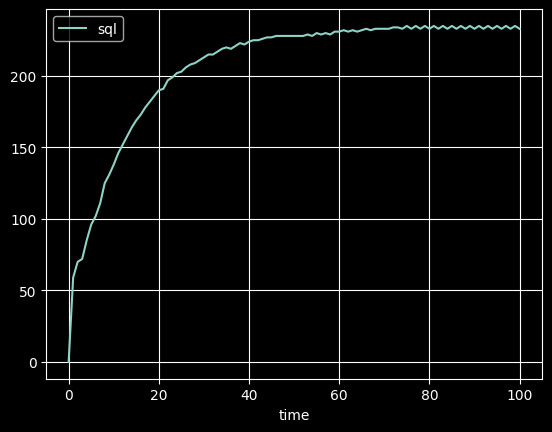

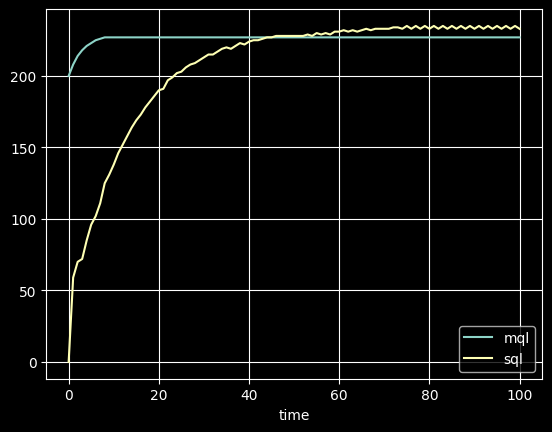

In [159]:
def plot_results(r, cols=None,title=None):
    if cols is None: cols = ['sql']
    r.loc[:, cols].plot()
    plt.title(title)
    plt.grid()

plot_results(stocks)
plot_results(stocks, ['mql', 'sql'])

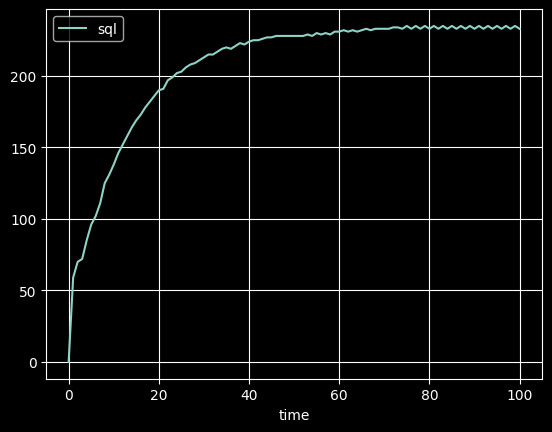

In [160]:
stocks = model.run(params={'nb industry events': 1})

plot_results(stocks)

In [161]:
# model.set_stepper?

In [162]:
coi = [
    # 'FINAL TIME', 'INITIAL TIME',
    # 'new mql',
    # 'mql decay', 'mql industry events', 'mql online campaign', 'mql salesreps', 'mql website', 
    # 'mql2sql', 
    'mql',
    'sql', 
    'prospects', 
    'pitched',
    'presentations', 
    'bidded',
    'signed', 
    'active',
    'stale', 
    # 'contracts',
    # 'bid2close', 
    # 'bids', 'completed', 
    # 'customer satisfaction rate', 'decay rate', 'lost bids', 
    # 'nb industry events',
    # 'nb mthly website visitor', 
    # 'new prospects',
    # 'online campaigns clickthru', 'online campaigns targets', 
    # 'prez2bid', 'prospect decay', 'prospect2prez',
    # 'raw leads from website', 'rawlead2mql industry event',
    # 'rawlead2mql online campaign', 'rawlead2mql website',
    # 'rawleads industry events', 'rawleads online campaign',
    # 'rawleads salesreps', 'sales qualified', 'salesrep leads2mql',
    # 'satisfied', 
    # 'sql decay', 'sql salesreps',
    # 'sql2prospect', 
    # 'stale prospects', 'unsatisfied',  'website cta rate'
]

In [163]:
p2model = Path('../data/04-crm.mdl')
assert p2model.suffix == '.mdl', f"Expected model file to have .mdl extension, got {p2model.suffix}."
assert p2model.is_file(), f"Model file {p2mdl} does not exist."

In [166]:
class RunSim:
    def __init__(self, p2model, final_time=200, params=None):
        self.p2model = p2model
        self.model = pysd.read_vensim(p2model)
        self.final_time = final_time
        self.params = params if params else {}
        self.result_df = None
        self.p2model.with_suffix('.pic').unlink(missing_ok=True)  # Remove previous output file if it exists

    def step(self, num_steps=1, params=None):
        model = pysd.load(self.p2model.with_suffix('.py'))
        output = ModelOutput()
        if self.p2model.with_suffix('.pic').exists():
            model.set_stepper(output,
                            final_time=self.final_time,
                            initial_condition=p2model.with_suffix('.pic'),
                            # return_columns=coi,
                            # step_vars=["nb industry events"],
                            )
            initial_condition_fname = self.p2model.with_suffix('.pic')
        else:
            model.set_stepper(output,
                            final_time=self.final_time,
                            # return_columns=coi,
                            # step_vars=["nb industry events"],
                            )
        model.step(
            num_steps=num_steps,
            # step_vars={"nb industry events": 1}
            )
        model.export(p2mdl.with_suffix('.pic'))
        step_results = output.collect(model)
        if self.result_df is None:
            self.result_df = step_results
        else:
            # concatenate new results to existing results, dropping the first row of new result equal to last row
            self.result_df = pd.concat([self.result_df, step_results.iloc[1:,]])

    def plot_results(self, coi, title='ModelOutput Results'):
        if self.result_df is None: 
            print("No results to plot. Please run the model first.")
            return
        else:
            fig, ax = plt.subplots(figsize=(12, 6))
            self.result_df[coi].plot(ax=ax)
            plt.title(title)
            plt.xlabel('Month')
            plt.ylabel('Value')
            plt.legend()
            plt.show()

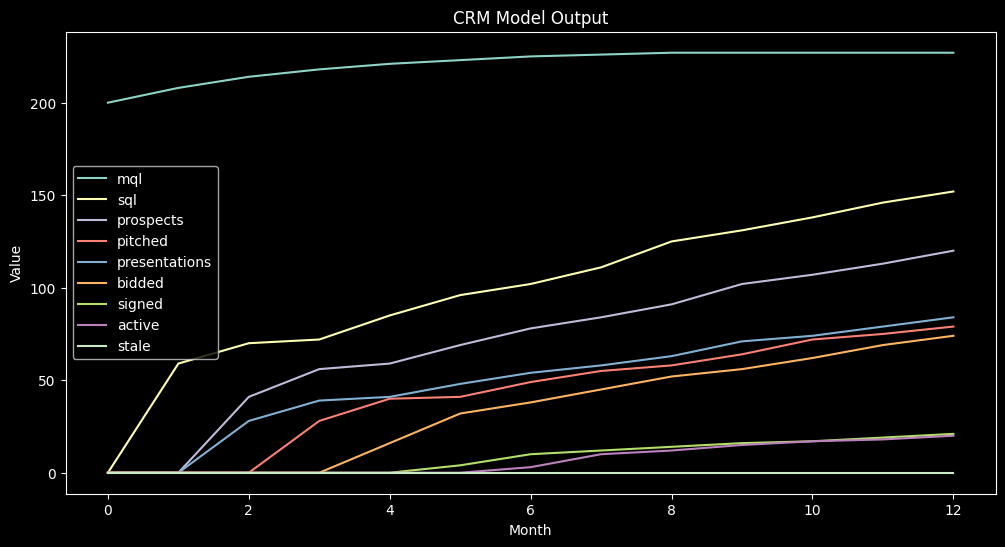

In [167]:
run = RunSim(p2model)

run.step(num_steps=3 * 4)
run.plot_results(coi, title='CRM Model Output')

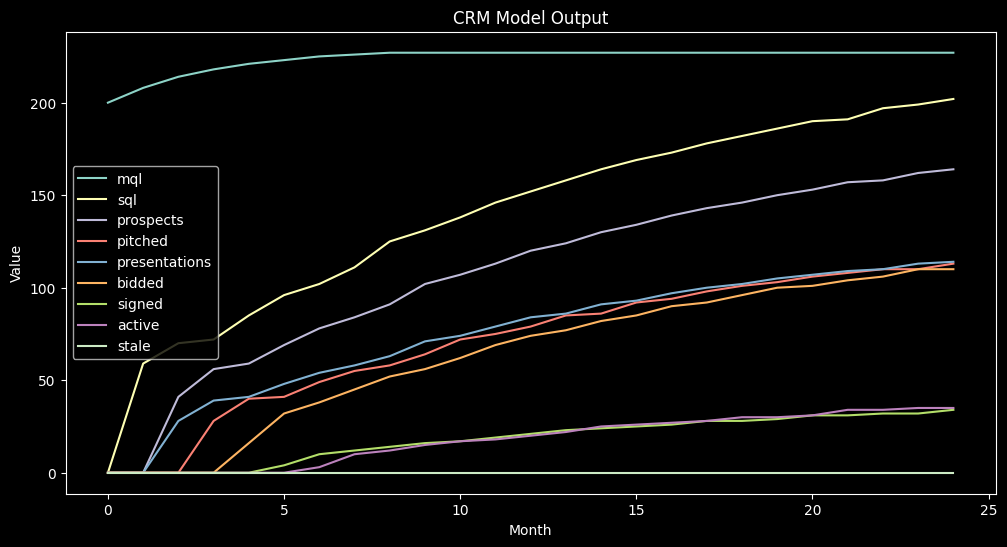

In [169]:
run.step(num_steps=3 * 4)
run.plot_results(coi, title='CRM Model Output')

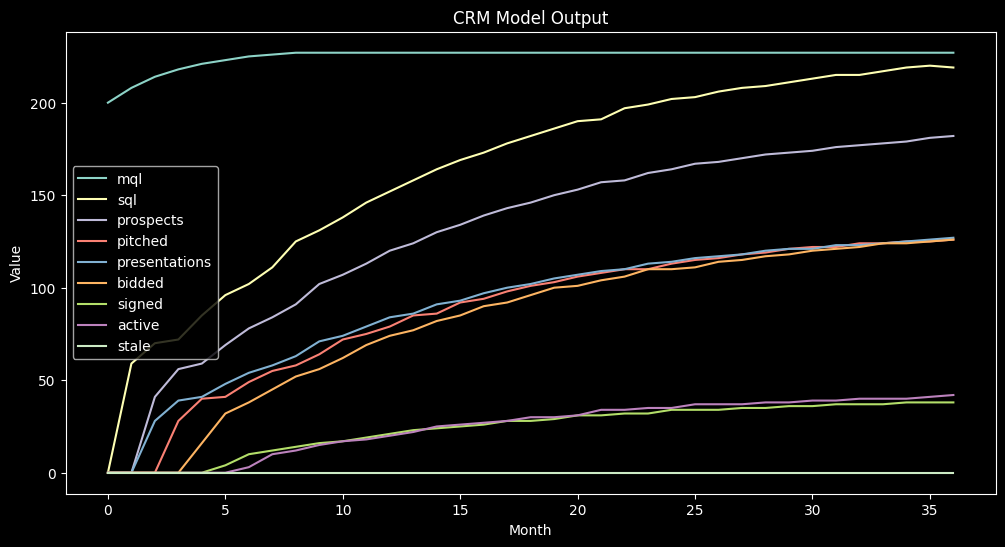

In [171]:
run.step(num_steps=3 * 4)
run.plot_results(coi, title='CRM Model Output')

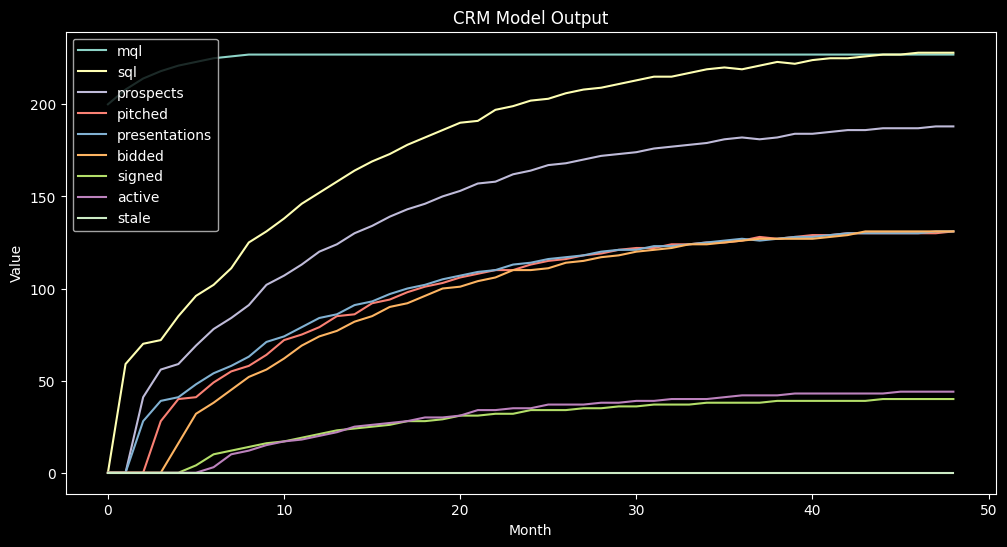

In [173]:
run.step(num_steps=3 * 4)
run.plot_results(coi, title='CRM Model Output')

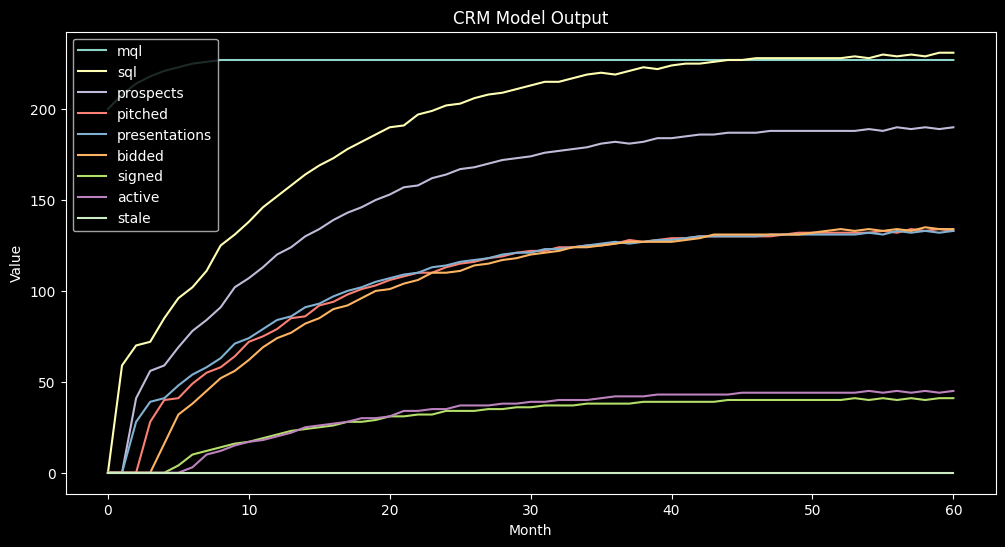

In [174]:
run.step(num_steps=3 * 4)
run.plot_results(coi, title='CRM Model Output')

/home/vtec/miniconda3/envs/crmsim/lib/python3.10/site-packages/pysd/py_backend/model.py:2379: UserWarning: 
Compatibility of exported states could be broken between different versions of PySD or xarray, current versions:
	PySD 3.14.3
	xarray 2025.4.0

  warnings.warn(


(13, 51)


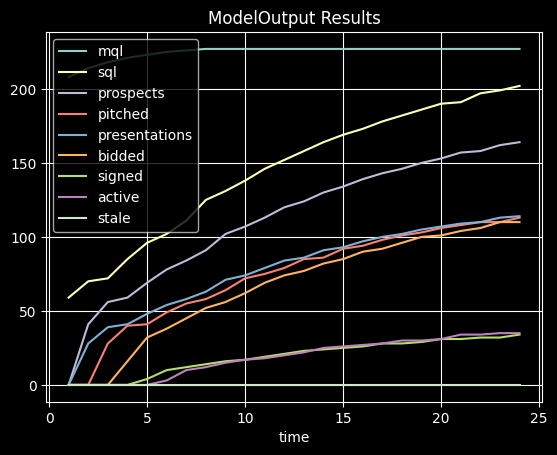

In [118]:
model = pysd.load(p2mdl.with_suffix('.py'))
output = ModelOutput()
model.set_stepper(
    output,
    initial_condition=p2mdl.with_suffix('.pic'),  # Load initial conditions from a .pic file
    final_time=200 # your new end time
)

model.step(
    num_steps=3 * 4, 
    #    step_vars={"nb industry events": 1}
    )

model.export(p2mdl.with_suffix('.pic'))

# store model results in a pandas DataFrame (default unless a file name
# is passed when instantiating the ModelOutput object)
new_results = output.collect(model)
print(new_results.shape)
result_df = pd.concat([result_df.iloc[1:, :], new_results])

plot_results(result_df, coi, title='ModelOutput Results')

In [41]:
coi2 = [
    'new mql',
    'mql decay', 'mql industry events', 'mql online campaign', 'mql salesreps', 'mql website', 
    'mql2sql', 
    'mql',
    'sql', 
    # 'prospects', 
    # 'pitched',
    # 'presentations', 
    # 'bidded',
    # 'signed', 
    # 'active',
    # 'stale', 
    # 'contracts',
    # 'bid2close', 
    # 'bids', 'completed', 
    # 'customer satisfaction rate', 'decay rate', 'lost bids', 
    # 'nb industry events',
    # 'nb mthly website visitor', 
    # 'new prospects',
    # 'online campaigns clickthru', 'online campaigns targets', 
    # 'prez2bid', 'prospect decay', 'prospect2prez',
    # 'raw leads from website', 'rawlead2mql industry event',
    # 'rawlead2mql online campaign', 'rawlead2mql website',
    # 'rawleads industry events', 'rawleads online campaign',
    # 'rawleads salesreps', 'sales qualified', 'salesrep leads2mql',
    # 'satisfied', 
    # 'sql decay', 'sql salesreps',
    # 'sql2prospect', 
    # 'stale prospects', 'unsatisfied',  'website cta rate'
]

In [181]:
var_of_interest = [
    # MQL Flows
    # 'mql',
    'mql website', 'mql online campaign', 'mql industry events', 'mql salesreps',  
    'mql decay', 
    # SQL Flows
    # 'sql',
    'sales qualified', 'stale prospects', 'lost bids', 'completed', 
    'new prospects',
    'sql decay',
    # PROSPECTS FLOW
    # 'prospects', 
    'new prospects',
    'presentations','prospect decay', 
    # PITCHED FLOW
    # 'pitched',
    'presentations','stale prospects',
    'bids', 
    # BIDDED FLOW
    # 'bidded',
    'bids', 
    'contracts','lost bids',
    # SIGNED Flow
    # 'signed', 
    'contracts',
    'satisfied', 'unsatisfied',
    # ACTIVE FLOW
    # 'active',
    'satisfied',
    'completed', 
    # STALE Flow
    # 'stale', 
    'unsatisfied',
]

In [182]:
run.result_df.loc[:,var_of_interest].T

time,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
mql website,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
mql online campaign,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
mql industry events,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
mql salesreps,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mql decay,30,31,32,32,33,33,33,33,34,34,...,34,34,34,34,34,34,34,34,34,34
sales qualified,59,60,61,62,62,62,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
stale prospects,0,0,0,11,16,16,19,22,23,25,...,52,52,52,52,53,52,53,53,53,53
lost bids,0,0,0,0,4,9,11,13,15,16,...,39,40,39,40,39,40,39,40,40,40
completed,0,0,0,0,0,0,2,9,10,13,...,39,39,39,40,39,40,39,40,39,40
new prospects,0,41,49,50,59,67,71,77,87,91,...,159,159,160,159,161,160,161,160,161,161
